# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress

# Import API key
from config import weathapi_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

In [8]:
# Print the city count to confirm sufficient count
len(cities)
#cities

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weathapi_key}&units={units}&q="
query_url

In [12]:
# set up lists to hold response info
cit = []
lat = []
lng = []
temp = []
humid = []
MaxT = []
cloud = []
wind = []
country = []
date = []
city_count = 0

# Get weather data
# weather_response = requests.get(query_url)
# weather_json = weather_response.json()
# Get the temperature from the response
#pprint(weather_json)
for city1 in cities:
    city_count += 1
    try:
        response = requests.get(query_url + city1).json()
        temp_lat = response['coord']['lat']
        temp_lng = response['coord']['lon']
        temp_temp = response['main']['temp']
        temp_humid = response['main']['humidity']
        temp_MaxT = response['main']['temp_max']
        temp_cloud = response['clouds']['all']
        temp_wind = response['wind']['speed']
        temp_country = response['sys']['country']
        temp_date = response['dt']
        temp_cit = response['name']
        lat.append(temp_lat)
        lng.append(temp_lng)
        temp.append(temp_temp) 
        humid.append(temp_humid)
        MaxT.append(temp_MaxT)
        cloud.append(temp_cloud)
        wind.append(temp_wind)
        country.append(temp_country)
        date.append(temp_date)
        cit.append(temp_cit)
        print(f"The temperature for: {city_count}. {city1} is {response['main']['temp']}")
    except:
        print(f"No information available for {city1}")

The temperature for: 1. bethel is 59.97
No information available for taolanaro
The temperature for: 3. cape town is 52.59
The temperature for: 4. bambous virieux is 66.58
The temperature for: 5. los llanos de aridane is 75.2
The temperature for: 6. jamestown is 66.02
The temperature for: 7. klaksvik is 46.4
The temperature for: 8. kirakira is 84.7
The temperature for: 9. hithadhoo is 83.26
The temperature for: 10. constitucion is 48.6
The temperature for: 11. saint george is 97.25
The temperature for: 12. castro is 49.32
The temperature for: 13. rikitea is 68.47
The temperature for: 14. busselton is 64.76
No information available for illoqqortoormiut
The temperature for: 16. yuncheng is 83.66
The temperature for: 17. thompson is 55.4
The temperature for: 18. punta arenas is 34.3
The temperature for: 19. terra rica is 61.77
The temperature for: 20. hobart is 59.09
The temperature for: 21. albany is 62.89
The temperature for: 22. yellowknife is 54.81
The temperature for: 23. ushuaia is 3

No information available for belushya guba
The temperature for: 195. tumbagaan is 84.63
The temperature for: 196. puerto escondido is 77.97
The temperature for: 197. kearney is 77.31
The temperature for: 198. inirida is 72.79
The temperature for: 199. malayal is 84.92
No information available for vaitupu
The temperature for: 201. katsuura is 89.38
The temperature for: 202. ashqelon is 74.37
The temperature for: 203. minot is 66.78
The temperature for: 204. nakatsugawa is 92.62
The temperature for: 205. poum is 70.12
The temperature for: 206. roma is 55.42
The temperature for: 207. namie is 88.65
The temperature for: 208. namatanai is 85.01
The temperature for: 209. bathsheba is 80.6
The temperature for: 210. buraydah is 82.4
The temperature for: 211. mogadishu is 76.46
No information available for barentsburg
The temperature for: 213. makaryev is 56.44
No information available for tsihombe
The temperature for: 215. egvekinot is 49.3
The temperature for: 216. pevek is 36.55
The temperat

No information available for utiroa
The temperature for: 385. vikhorevka is 63.21
The temperature for: 386. saint anthony is 78.89
The temperature for: 387. vihti is 48.7
The temperature for: 388. north bend is 62.26
The temperature for: 389. kuytun is 55.69
The temperature for: 390. aklavik is 57.2
The temperature for: 391. norman wells is 57.2
The temperature for: 392. yuci is 71.6
The temperature for: 393. la ronge is 62.6
The temperature for: 394. santa isabel do rio negro is 73.54
The temperature for: 395. aleksandrov gay is 67.55
The temperature for: 396. dubai is 91.15
The temperature for: 397. soe is 78.75
The temperature for: 398. takahashi is 92.34
The temperature for: 399. bundaberg is 73.92
The temperature for: 400. rajampet is 84.72
No information available for urdzhar
No information available for donja vrezina
No information available for labutta
The temperature for: 404. istok is 55.62
The temperature for: 405. santa isabel is 55.36
The temperature for: 406. iseyin is 68

The temperature for: 573. pergamino is 49.53
The temperature for: 574. rockport is 85.59
The temperature for: 575. cururupu is 73.89
The temperature for: 576. cockburn town is 83.14
The temperature for: 577. erenhot is 84.42
The temperature for: 578. ixtapa is 83.1
The temperature for: 579. ilulissat is 42.8
The temperature for: 580. kruisfontein is 57
The temperature for: 581. luderitz is 53.4
The temperature for: 582. carndonagh is 51.98
The temperature for: 583. san luis is 50.25
The temperature for: 584. havre-saint-pierre is 46.4
No information available for turtkul
The temperature for: 586. tagusao is 85.78
The temperature for: 587. kang is 57.56
The temperature for: 588. nuuk is 42.8
The temperature for: 589. oum hadjer is 78.22
The temperature for: 590. tlacotepec is 65.23
The temperature for: 591. la maddalena is 77
The temperature for: 592. takoradi is 73.33
The temperature for: 593. grajau is 77.59
The temperature for: 594. wadi maliz is 68
The temperature for: 595. monroe i

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
#Verify length of arrays
print(len(cit))
print(len(lat))
print(len(lng))
print(len(temp))
print(len(humid))
print(len(MaxT))
print(len(cloud))
print(len(wind))
print(len(country))
print(len(date))

557
557
557
557
557
557
557
557
557
557


In [14]:
weatherdict = {
        "City": cit,
        "Lat": lat,
        "Lng": lng,
        "Temp": temp,
        "Humidity": humid,
        "Max Temp": MaxT,
        "Cloudiness": cloud,
        "Wind Speed": wind,
        "Country": country,
        "Date": date
}

In [15]:
weather_data = pd.DataFrame(weatherdict)
weather_data.head()

,City,Lat,Lng,Temp,Humidity,Max Temp,Cloudiness,Wind Speed,Country,Date
0,Bethel,41.37,-73.41,59.97,72,62.01,1,3.56,US,1598496275
1,Cape Town,-33.93,18.42,52.59,81,54.00,0,1.12,ZA,1598496263
2,Bambous Virieux,-20.34,57.76,66.58,93,66.99,75,9.17,MU,1598496315
3,Los Llanos de Aridane,28.66,-17.92,75.20,94,75.20,20,9.17,ES,1598496251
4,Jamestown,42.10,-79.24,66.02,93,66.99,75,5.82,US,1598496057


In [16]:
# Output to CSV file
weather_data.to_csv("weather_data.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
#  Get the indices of cities that have humidity over 100%.
weather_data.loc[(weather_data["Humidity"] > 100)]

,City,Lat,Lng,Temp,Humidity,Max Temp,Cloudiness,Wind Speed,Country,Date


In [18]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# NO CITIES HAVE HUMIDITY > 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [19]:
Adjlat_df = weather_data.copy()
Adjlat_df['Lat'] = Adjlat_df["Lat"].abs()
Adjlat_df.head()

,City,Lat,Lng,Temp,Humidity,Max Temp,Cloudiness,Wind Speed,Country,Date
0,Bethel,41.37,-73.41,59.97,72,62.01,1,3.56,US,1598496275
1,Cape Town,33.93,18.42,52.59,81,54.00,0,1.12,ZA,1598496263
2,Bambous Virieux,20.34,57.76,66.58,93,66.99,75,9.17,MU,1598496315
3,Los Llanos de Aridane,28.66,-17.92,75.20,94,75.20,20,9.17,ES,1598496251
4,Jamestown,42.10,-79.24,66.02,93,66.99,75,5.82,US,1598496057


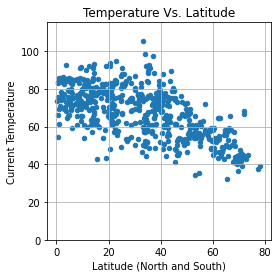

In [20]:
# Generate scatterplot
Adjlat_df.plot(kind="scatter", x="Lat", y="Temp", grid=True, figsize=(4,4),
              title="Temperature Vs. Latitude")
plt.xlabel("Latitude (North and South)")
plt.ylabel("Current Temperature")
plt.ylim(0, max(Adjlat_df["Temp"])+10)
plt.savefig("Temp.png", format="png")
plt.show()

In [21]:
# The above code is comparing what currrent temperatures are at various latitudes.  I used the .abs() function to
#   make the data consistent in both the northern and southern hemispheres.  The data shows a distinct decreasing trend as
#   you go further away from the equator.

## Latitude vs. Humidity Plot

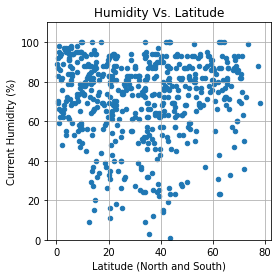

In [22]:
# Generate scatterplot
Adjlat_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(4,4),
              title="Humidity Vs. Latitude")
plt.xlabel("Latitude (North and South)")
plt.ylabel("Current Humidity (%)")
plt.ylim(0, max(Adjlat_df["Humidity"])+10)
plt.savefig("Humidity.png", format="png")
plt.show()

In [23]:
# The above code is comparing what currrent humidity are at various latitudes.  I used the .abs() function to
#   make the data consistent in both the northern and southern hemispheres.  The data appears to show more sporadic humidity
#   readings at lower altitudes, with slightly more consistent readings in the higher latitudes.

## Latitude vs. Cloudiness Plot

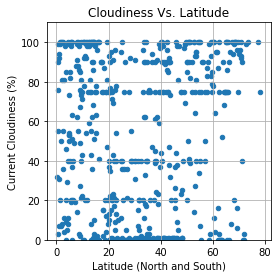

In [24]:
# Generate scatterplot
Adjlat_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(4,4),
              title="Cloudiness Vs. Latitude")
plt.xlabel("Latitude (North and South)")
plt.ylabel("Current Cloudiness (%)")
plt.ylim(0, max(Adjlat_df["Cloudiness"])+10)
plt.savefig("Cloudy.png", format="png")
plt.show()

In [25]:
# The above code is comparing what currrent cloudiness at various latitudes.  I used the .abs() function to
#   make the data consistent in both the northern and southern hemispheres.  The data doesn't appear to have any correlation
#   between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

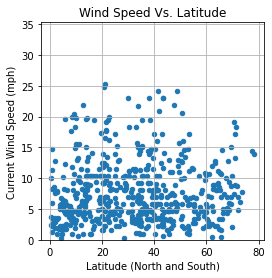

In [26]:
# Generate scatterplot
Adjlat_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(4,4),
              title="Wind Speed Vs. Latitude")
plt.xlabel("Latitude (North and South)")
plt.ylabel("Current Wind Speed (mph)")
plt.ylim(0, max(Adjlat_df["Wind Speed"])+10)
plt.savefig("Wind.png", format="png")
plt.show()

In [27]:
# The above code is comparing current wind speeds at various latitudes.  I used the .abs() function to make the data more
#   consistent in both the northern and southern hemispheres.  While there appears to be a slight decreasing trend in wind
#   speed as you go further from the equator, there are more extreme measurements as you get closer to the equator.

## Linear Regression

In [28]:
#Break main dataframe into northern and southern dataframes
north_df = weather_data.loc[(weather_data["Lat"] >= 0)]
south_df = weather_data.loc[(weather_data["Lat"] < 0)]
north_df = north_df.reset_index()
south_df = south_df.reset_index()
#north_df.head()
#south_df.head()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.49334500258056685
y = -0.49x + 87.12


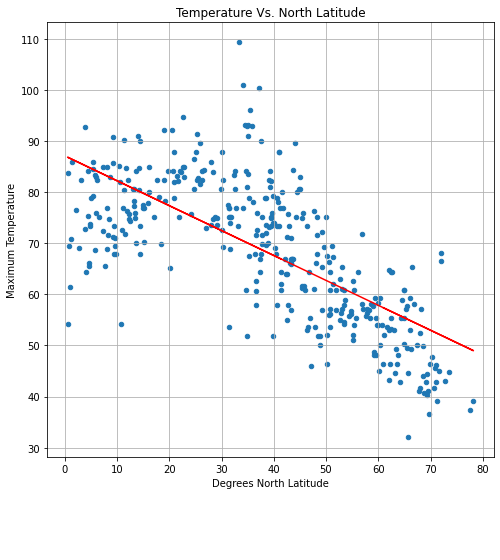

In [29]:
#Calculate linear regression model for north latitude and maximum temperature
Latitude = north_df["Lat"]
TempMax = north_df["Max Temp"]
north_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(8,8), title="Temperature Vs. North Latitude")
plt.xlabel("Degrees North Latitude")
plt.ylabel("Maximum Temperature")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, TempMax)
regress_values = Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [30]:
# The above linear regression model shows a moderate correlation between latitude and maximum temperature.  Between
#   30 and 40 degrees north latitude there appears to be more variability in temperature measurements.

The r-squared is: 0.4978280308305447
y = 0.66x + 80.45


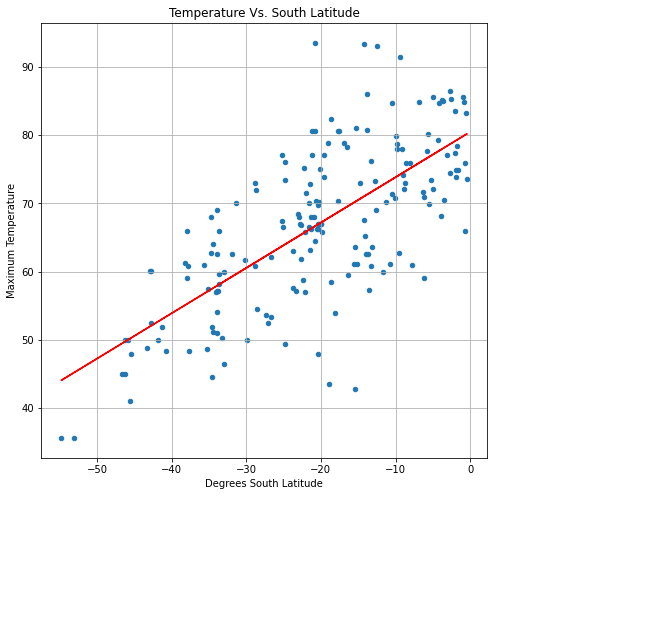

In [31]:
#Calculate linear regression model for south latitude and maximum temperature
SLatitude = south_df["Lat"]
STempMax = south_df["Max Temp"]
south_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(8,8), title="Temperature Vs. South Latitude")
plt.xlabel("Degrees South Latitude")
plt.ylabel("Maximum Temperature")
(slope, intercept, rvalue, pvalue, stderr) = linregress(SLatitude, STempMax)
regress_values = SLatitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(SLatitude,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

In [32]:
#There appears to be a stronger correlation in the southern hemisphere than the northern hemisphere as far as correlating
#  latitude with maximum temperature.   There also appear to be some more variability in measurements between 10 and 20
#  degrees south latitude.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.006946830682441866
y = -0.08x + 75.92


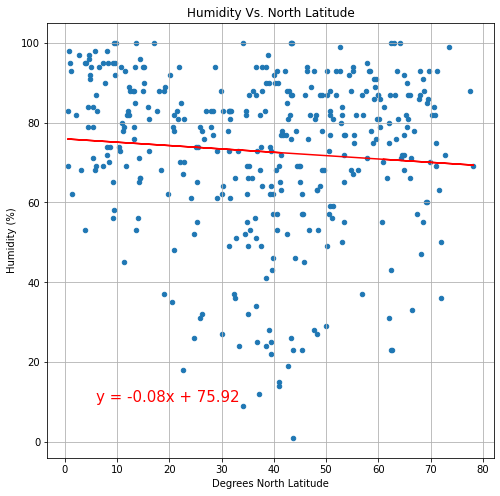

In [33]:
#Calculate linear regression model for north latitude and humidity
Humidity = north_df["Humidity"]
north_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(8,8), title="Humidity Vs. North Latitude")
plt.xlabel("Degrees North Latitude")
plt.ylabel("Humidity (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Humidity)
regress_values = Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

In [34]:
#There appears to be minimal corrrelation between humidity and latitude though the lowest instances in humidity are between
#  20 and 50 degrees north latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0005921148327798264
y = 0.04x + 68.52


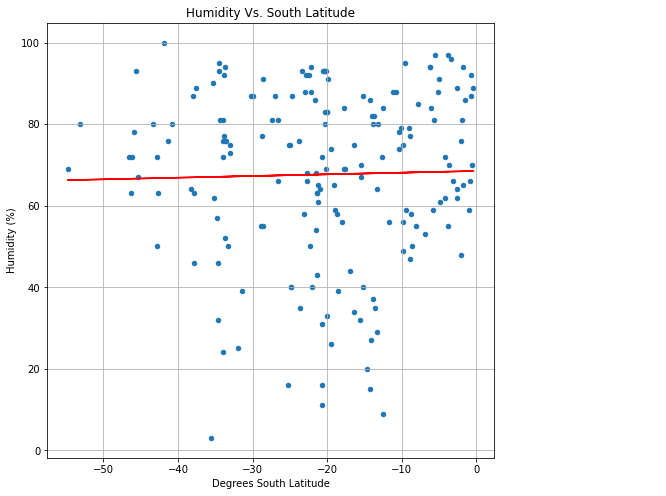

In [35]:
#Calculate linear regression model for south latitude and humidity
SHumidity = south_df["Humidity"]
south_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(8,8), title="Humidity Vs. South Latitude")
plt.xlabel("Degrees South Latitude")
plt.ylabel("Humidity (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(SLatitude, SHumidity)
regress_values = SLatitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(SLatitude,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

In [36]:
#There appears to be minimal corrrelation between humidity and latitude though the lowest instances in humidity are between
#  10 and 40 degrees south latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0007840431428164914
y = 0.06x + 51.01


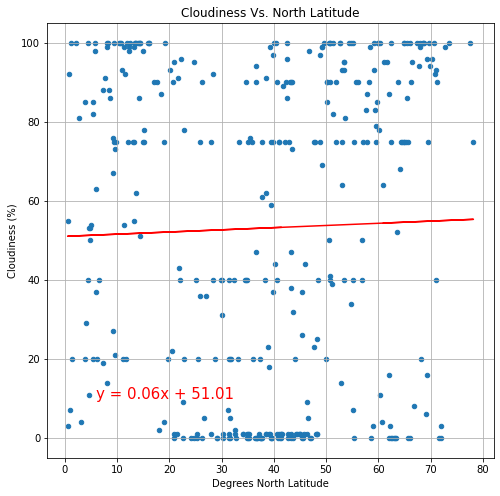

In [37]:
#Calculate linear regression model for north latitude and cloudiness
Cloudiness = north_df["Cloudiness"]
north_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(8,8), title="Cloudiness Vs. North Latitude")
plt.xlabel("Degrees North Latitude")
plt.ylabel("Cloudiness (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Cloudiness)
regress_values = Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

In [38]:
# There appears to be no correlation between cloud cover and latitude; measurements are sporadic at every latitude.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.005322591868142506
y = 0.21x + 45.59


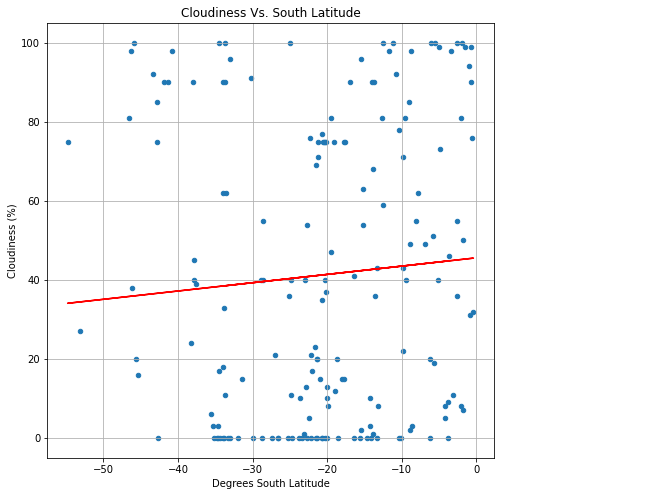

In [39]:
#Calculate linear regression model for north latitude and cloudiness
SCloudiness = south_df["Cloudiness"]
south_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(8,8), title="Cloudiness Vs. South Latitude")
plt.xlabel("Degrees South Latitude")
plt.ylabel("Cloudiness (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(SLatitude, SCloudiness)
regress_values = SLatitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(SLatitude,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

In [40]:
# There appears to be no correlation between cloud cover and south latitude; measurements are sporadic at every latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0043553687615490826
y = 0.02x + 6.79


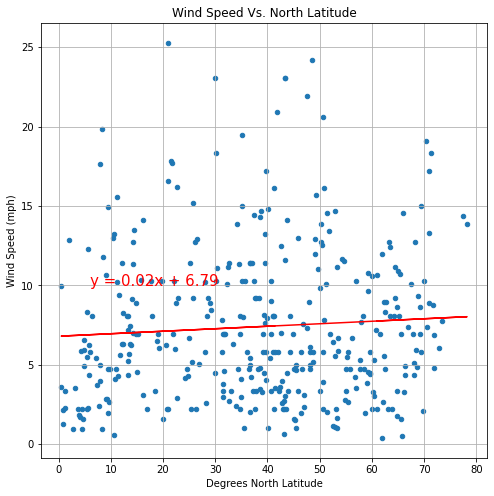

In [41]:
#Calculate linear regression model for north latitude and wind speed
Windspeed = north_df["Wind Speed"]
north_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(8,8), title="Wind Speed Vs. North Latitude")
plt.xlabel("Degrees North Latitude")
plt.ylabel("Wind Speed (mph)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Windspeed)
regress_values = Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

In [42]:
# There appears to be little to no correlation between wind speed and latitude; measurements are sporadic at every latitude
#  though the highest wind speeds are between 20 and 50 degrees north latitude.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03850026783383117
y = -0.09x + 6.57


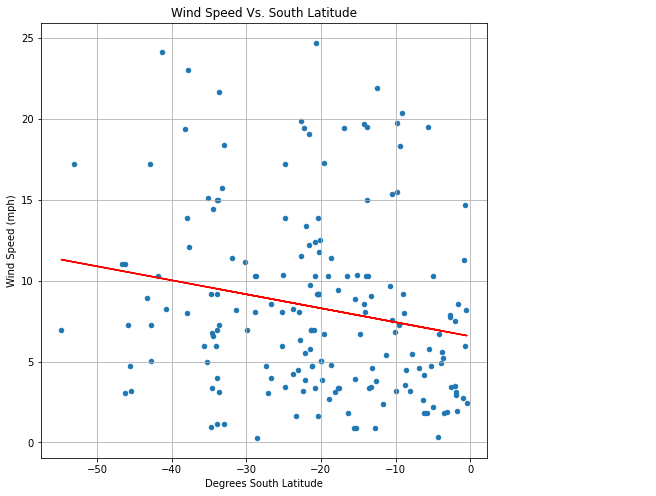

In [43]:
#Calculate linear regression model for south latitude and wind speed
SWindspeed = south_df["Wind Speed"]
south_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(8,8), title="Wind Speed Vs. South Latitude")
plt.xlabel("Degrees South Latitude")
plt.ylabel("Wind Speed (mph)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(SLatitude, SWindspeed)
regress_values = SLatitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(SLatitude,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

In [44]:
# There appears to be little to no correlation between wind speed and latitude; measurements are sporadic at every latitude